In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from eda import ekstrakcja
from sklearn.preprocessing import LabelEncoder

**Informacje o zbiorze**

In [11]:
df = pd.read_json("data/raw_data_cocktail.json")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            134 non-null    int64 
 1   name          134 non-null    object
 2   category      134 non-null    object
 3   glass         134 non-null    object
 4   tags          35 non-null     object
 5   instructions  134 non-null    object
 6   imageUrl      134 non-null    object
 7   alcoholic     134 non-null    int64 
 8   createdAt     134 non-null    object
 9   updatedAt     134 non-null    object
 10  ingredients   134 non-null    object
dtypes: int64(2), object(9)
memory usage: 11.6+ KB


**Unikatowe wartości w niektórych kolumnach**

In [15]:
df["alcoholic"].unique()

array([1])

In [16]:
df["category"].unique()

array(['Cocktail', 'Ordinary Drink', 'Punch / Party Drink'], dtype=object)

In [17]:
df["glass"].unique()

array(['Highball glass', 'Old-fashioned glass', 'Cocktail glass',
       'Copper Mug', 'Whiskey Glass', 'Collins glass',
       'Pousse cafe glass', 'Champagne flute', 'Whiskey sour glass',
       'Brandy snifter', 'White wine glass'], dtype=object)

**Spojerzenie na składniki**

In [29]:
df["ingredients"].head(1)

0    [{'id': 170, 'name': 'Soda water', 'description': None, 'alcohol': 1, 'type': None, 'percentage': None, 'imageUrl': None, 'createdAt': '2024-08-18T19:01:57.000+00:00', 'updatedAt': '2024-08-18T19:01:57.000+00:00'}, {'id': 305, 'name': 'Light Rum', 'description': 'Light rums, also referred to as "silver" or "white" rums, in general, have very little flavor aside from a general sweetness. Light rums are sometimes filtered after aging to remove any colour. The majority of light rums come from Puerto Rico. Their milder flavors make them popular for use in mixed drinks, as opposed to drinking them straight. Light rums are included in some of the most popular cocktails including the Mojito and the Daiquiri.', 'alcohol': 1, 'type': 'Rum', 'percentage': None, 'imageUrl': 'https://cocktails.solvro.pl/images/ingredients/light-rum.png', 'createdAt': '2024-08-18T19:02:37.000+00:00', 'updatedAt': '2024-08-18T19:02:37.000+00:00', 'measure': '2-3 oz '}, {'id': 312, 'name': 'Lime', 'description':

**Spojrzenie na tagi**

In [21]:
df["tags"].head(30)

0     [IBA, ContemporaryClassic, Alcoholic, USA, Asia, Vegan, Citrus, Brunch, Hangover, Mild]
1                                                [IBA, Classic, Alcoholic, Expensive, Savory]
2                                      [Strong, Asia, StrongFlavor, Brunch, Vegetarian, Sour]
3                                                                              [IBA, Classic]
4                                              [IBA, Classic, Alcoholic, ContemporaryClassic]
5                                                        [IBA, Classic, Christmas, Alcoholic]
6                                                                       [IBA, Classic, Beach]
7                                                                  [IBA, ContemporaryClassic]
8                                                                   [IBA, Classic, Alcoholic]
9                                                                  [IBA, ContemporaryClassic]
10                                                          

**Spojrzenie na instrukcje**

In [25]:
df["instructions"].head(10)

0                                                                                                                                Muddle mint leaves with sugar and lime juice. Add a splash of soda water and fill the glass with cracked ice. Pour the rum and top with soda water. Garnish and serve with straw.
1                                                                                 Place sugar cube in old fashioned glass and saturate with bitters, add a dash of plain water. Muddle until dissolved.\r\nFill the glass with ice cubes and add whiskey.\r\n\r\nGarnish with orange twist, and a cocktail cherry.
2                                                                                                                                                         Combine all ingredients (except cola) and pour over ice in a highball glass. Add the splash of cola for color. Decorate with a slice of lemon and serve.
3                                                                              

**Ilość każdego rodzaju koktajlu**

In [9]:
df["category"].value_counts()

category
Ordinary Drink         127
Cocktail                 6
Punch / Party Drink      1
Name: count, dtype: int64

**Ilość każdego szkła**

In [3]:
df["glass"].value_counts()

glass
Cocktail glass         59
Old-fashioned glass    25
Highball glass         17
Whiskey sour glass     11
Collins glass          10
Champagne flute         6
Pousse cafe glass       2
Copper Mug              1
Whiskey Glass           1
Brandy snifter          1
White wine glass        1
Name: count, dtype: int64

In [4]:
df["ingredients"] = df["ingredients"].apply(lambda x: [ingredient['name'] for ingredient in x])
składniki = pd.DataFrame(0, index=df.index, columns=ekstrakcja(df.ingredients))
for index, składnik in df["ingredients"].items():
    składniki.loc[index, składnik] = 1
df = df.drop(columns="ingredients")
df = pd.concat([df, składniki], axis=1)
df_cor_ing = df.drop(columns=["id", "imageUrl", "createdAt", "updatedAt", "instructions", "alcoholic", "tags", "name", "category"])
df_cor_tags = df.drop(columns=["id", "imageUrl", "createdAt", "updatedAt", "instructions", "alcoholic", "glass", "name", "category"])

**Skorelowane ze sobą składniki (1 > wartość korelacji > 0.6):**

In [5]:
label_encoder = LabelEncoder()
df_cor_ing["glass"] = label_encoder.fit_transform(df_cor_ing["glass"])
macierz_korelacji = df_cor_ing.corr()
korelacja = (macierz_korelacji > 0.6) & (macierz_korelacji < 1)
pary = korelacja.stack().loc[korelacja.stack()]
unikatowe = []
for index, value in pary.items():
    col1, col2 = index
    if col1 > col2:
        unikatowe.append((col1, col2))
print("Korelacje składników:")
for col1, col2 in unikatowe:
    print(f"{col1} - {col2}")

Korelacje składników:
Tequila - Salt
Powdered Sugar - Carbonated Water
Yellow Chartreuse - Green Chartreuse
Nutmeg - Light Cream
Nutmeg - Egg
Orange - Maraschino Cherry
Tabasco Sauce - Celery Salt
Tomato Juice - Celery Salt
Worcestershire Sauce - Tabasco Sauce
Worcestershire Sauce - Tomato Juice
Tia Maria - Añejo Rum
Cognac - Champagne
Sweet and Sour - Irish Whiskey
Sweet and Sour - Peach brandy
Sweet and Sour - Orgeat Syrup
Red Wine - Lemon-lime soda
Sherry - Coffee Brandy
Sherry - Lime vodka


<Axes: title={'center': 'Częstość wysętpowania danego składnika w koktajlach'}>

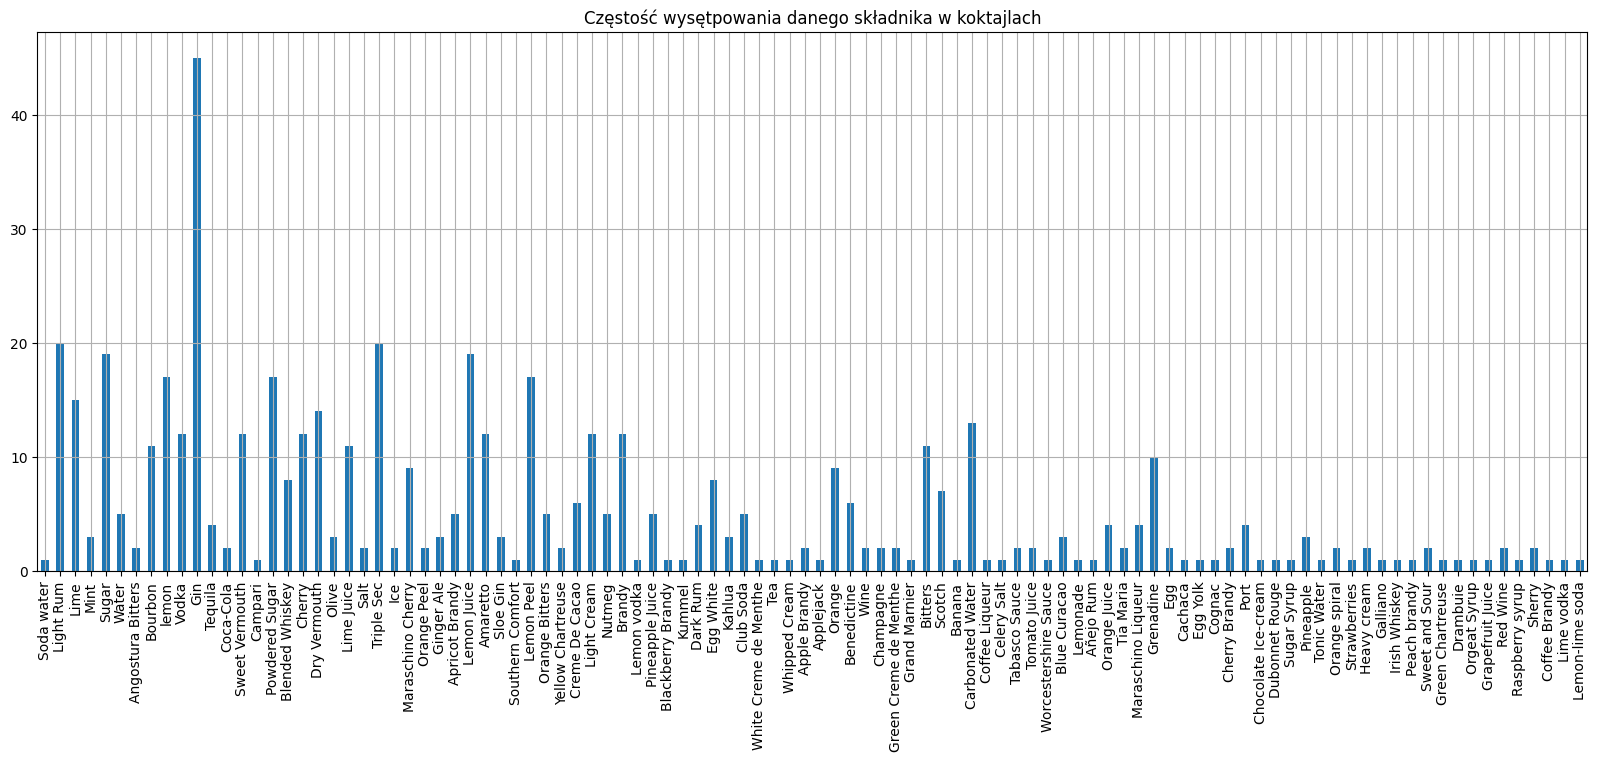

In [6]:
df_cor_ing.drop(columns="glass").sum().plot(kind="bar", figsize=(20,7), grid=True, title="Częstość wysętpowania danego składnika w koktajlach")

**Korelajce tagów z tagami i składnikami (1 > wartość korelacji > 0.6):**

In [7]:
df_work = df_cor_tags.dropna(subset=["tags"]).copy() #WYRZUCAM WIERSZE BEZ TAGÓW
tagi = set(tag for sublist in df_work["tags"] for tag in sublist)
for tag in tagi: #DODAJĘ KOLUNNY 0/1 DLA KAŻDEGO KOTAJLU DOTYCZĄCE OTAGOWANIA W CELU ZNALEZIENIA KORELACJI
    df_work[tag] = df_work["tags"].apply(lambda x: 1 if tag in x else 0)
df_work.drop(columns="tags", inplace=True)
maska = (df_work.corr() > 0.6) & (df_work.corr() < 1.0)
print("Korelacje tagów:")
for i in range(len(maska)):
    for j in range(i):
        if maska.iloc[i, j]:
            wiersz = maska.index[i]
            kolumna = maska.columns[j]
            
            if wiersz in tagi or kolumna in tagi:
                print(f"{wiersz} - {kolumna}")

Korelacje tagów:
Expensive - Angostura Bitters
Citrus - Soda water
Vegan - Mint
Vegan - Citrus
Brunch - Tequila
Strong - Coca-Cola
USA - Mint
USA - Citrus
StrongFlavor - Strong
Vegetarian - Coca-Cola
Vegetarian - StrongFlavor
Nutty - Creme De Cacao
Nutty - Light Cream
Nutty - Nutmeg
Mild - Mint
Mild - Citrus
Dairy - Brandy
Dairy - Nutty
Chilli - Lemon Peel
Breakfast - Tabasco Sauce
Breakfast - Tomato Juice
Sour - Strong
Sour - Vegetarian
Hangover - Soda water
Hangover - Celery Salt
Hangover - Vegan
Hangover - Brunch
Hangover - USA
Hangover - Mild
Hangover - Breakfast
Savory - Angostura Bitters
Asia - Soda water
Asia - Vegan
Asia - Brunch
Asia - Strong
Asia - USA
Asia - Vegetarian
Asia - Mild
